## COMPARISON OF LOGISTIC REGRESSION AND SUPPORT VECTOR MACHİNE 


### Data Set Information

- The data is related with direct marketing campaigns of a Portuguese banking institution [1]. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

- The data has 86520 entries. Each column contains 4119 entry and there are 21 columns which contain client data, contact information, attributes and output variable.


#### Client Data

**1. Age:** This column indicates the age of the customer. It is a numeric variable and ranges between 18 and 88. 	

**2. Job:** This column indicates the job of the customer. There are only a few options. These are
- 'admin',
- 'blue-collar',
- 'entrepreneur',
- 'housemaid',
- 'management',
- 'retired',
- 'self-employed',
- 'services',
- 'student',
- 'technician',
- 'unemployed',
- 'unknown'

**3. Marital:** This column indicates the marital status of the customer. It is a categorical variable and the options are

- 'divorced',
- 'married',
- 'single',
- 'unknown'

**4.Education:** This column indicates the education status of the customer. It is a categorical variable and the options are 
- 'basic.4y',
- 'basic.6y',
- 'basic.9y',
- 'high.school',
- 'illiterate',
- 'professional.course',
- 'university.degree',
- 'unknown'

**5.Default:** This column indicates that customers have credit in default. It is a categorical variable and there are three options. These are 

- 'no',
- 'yes',
- 'unknown'

**6.Housing:** This column indicates that customers have housing loan. It is a categorical variable and there are three options. These are 

- 'no',
- 'yes',
- 'unknown'

**7.Loan:** This column indicates that customers have personal loan. It is a categorical variable and there are three options. These are  

- 'no',
- 'yes',
- 'unknown'


#### Information Of The Last Contact

**8.Contact:** This column indicates the type of communication established with the customer. It is a categorical variable and there are two options. These are 

- 'cellular',
- 'telephone'

**9.Month:** This column indicates that month of year which is last contact with the customer. It is a categorical variable and the options are

- 'jan', 
- 'feb',
- 'mar',
- 'apr',
- 'may',
- 'jun',
- 'jul',
- 'aug',
- 'sep',
- 'oct',
- 'nov',
- 'dec'

**10.Day_of_week:** This column shows that day of week which is last contact with the customer. It is a categorical variable and the options are

- 'mon',
- 'tue',
- 'wed',
- 'thu',
- 'fri'

**11.Duration:** This column indicates that how long the last duration of contact with the customer. It is a numeric variable and ranges between 0 and 3643 seconds. If the duration is 0 ,it means that the output variable is 'no'. Also the duration is not known before a call is performed. After the end of the call, y is obviously known. Thus, we  should only include this input for benchmark purposes.


#### Other Attributes

**12.Campaign:** This column indicates that number of contacts performed during this campaign and for this client. It is a numeric variable and ranges between 1 and 35.	

**13.Pdays:** This column indicates that number of days that passed by after the client was last contacted from a previous campaign. It is a numeric variable and ranges between 0 and 999. Also 999 means that client was not previously contacted.	

**14.Previous:** This column indicates that number of contacts performed before this campaign and for this client. It is a numeric variable and ranges between 0 and 6.

**15.Poutcome:** This column indicates that outcome of the previous marketing campaign. It is a categorical variable and the options are   

- 'failure',
- 'nonexistent',
- 'success'


#### Social And Economic Context Attributes 

**16.Emp.var.rate:** This column indicates that employment variation rate. It is a numeric variable and ranges between -3 and 1.4. In addition this rate came from quarterly indicator.	

**17.Cons.price.idx:** This column indicates that consumer price index. It is a numeric variable and ranges between 92201 and 94767. In addition this index come from monthly indicator.

**18.Cons.conf.idx:** This column indicates that consumer confidence index. It is a numeric variable and ranges between -50 and -33. In addition this index come from monthly indicator.	

**19.Euribor3m:** This column indicates that Euribor 3 month rate which come daily indicator. It is a numeric variable and ranges between 1 and 5045.

**20.Nr.employed:** This column indicates that number of employees which come quarterly indicator. It is also a numeric variable and ranges between 5191 and 5228.1. 

#### Output Variable 

**21.Y:** This column indicates that has the client subscribed a term deposit. It is a binary variable and the options are 

- 'yes',
- 'no'



### **Overview of the data:**


In [417]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset=pd.read_csv('Data-main.csv',header=0)
print("Size of Data =", dataset.shape)
dataset=dataset.dropna()
dataset.head()

Size of Data = (4119, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,45,entrepreneur,married,university.degree,unknown,yes,yes,cellular,aug,mon,...,2,999,0,nonexistent,1.4,93444.0,-36.1,4965.0,5228.1,no
1,29,technician,single,university.degree,no,yes,yes,cellular,aug,wed,...,3,999,0,nonexistent,1.4,93444.0,-36.1,4967.0,5228.1,no
2,40,management,married,high.school,no,no,yes,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93444.0,-36.1,4965.0,5228.1,no
3,38,technician,married,professional.course,no,yes,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93444.0,-36.1,4965.0,5228.1,yes
4,34,admin.,married,university.degree,no,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93444.0,-36.1,4963.0,5228.1,no


Initially we construct data for *.head()* code and we see the first six columns of the data and we see the size of data with *.shape()*.

In [418]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,84854.473707,-40.499102,3244.553921,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,27265.192237,4.594578,1995.780101,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,93.200000,-50.800000,0.640000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,92893.000000,-42.700000,1281.000000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93749.000000,-41.800000,4856.000000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93994.000000,-36.400000,4961.000000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94767.000000,-26.900000,5045.000000,5228.100000


And then we look at the describing information of numerical columns. It is obviously numerical column values are not close each other.

In [419]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

If any statistical method is applied, successful operation can not be obtained if there are deleted or damaged cells in the data.

It seems that there is no undefined value or null cell in data. This means that we can efficiently complete the analysis.

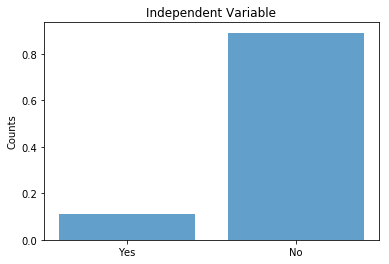

In [420]:
y_name = ('Yes','No')
dataset['y_new']=dataset.y.map({'yes':1, 'no':0})
incomes = (0.1094926,0.8905074)
y_post = np.arange(len(y_name))
plt.bar( y_post,incomes,align='center',alpha=0.7)
plt.xticks(y_post,y_name)
plt.ylabel('Counts')
plt.title('Independent Variable')
plt.show()

Here y values are seen to be unbalanced. 

*451 of the customer*, which corresponds to approximately **11%**, gave a "Yes" answer when the customer was asked to sign up for a time deposit and *3668 of the customer*, which corresponds to approximately **89%**, gave "No" reply when the customer was asked to sign up for a time deposit. 

In [421]:
categorical_vars = dataset.describe(include=["object"]).columns
data_dummies = pd.get_dummies(dataset, columns=categorical_vars, drop_first=True)
data_dummies.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_new',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'p

In [422]:
dataset.drop(['marital','job','education','y'],1, inplace=True)
dataset['default'] = dataset['default'].astype('category')
dataset['housing'] = dataset['housing'].astype('category')
dataset['loan'] = dataset['loan'].astype('category')
dataset['contact'] = dataset['contact'].astype('category')
dataset['month'] = dataset['month'].astype('category')
dataset['day_of_week'] = dataset['day_of_week'].astype('category')
dataset['poutcome'] = dataset['poutcome'].astype('category')

categoricals = list(dataset.dtypes[dataset.dtypes == 'category'].index)
columnnames = list(dataset)

datasetNumerics = dataset.drop(categoricals,1)

from sklearn import preprocessing
classes = []
for i in categoricals:
    le = preprocessing.LabelEncoder()
    dataset[i] = le.fit_transform(dataset[i].as_matrix())
    classes.append(list(le.classes_))
    
enc=preprocessing.OneHotEncoder(dtype=np.int32,sparse=False)
X = enc.fit_transform(dataset[categoricals])
unique = dataset[categoricals].apply(lambda x: x.value_counts()).unstack()
unique = unique[~unique.isnull()]
dataset[categoricals].head()
enc_cols = list(unique.index.map('{0[0]}_{0[1]}'.format))

datasetCategoricals = pd.DataFrame(X, columns=enc_cols, index=dataset[categoricals].index)
dataset = datasetNumerics.merge(datasetCategoricals,left_index = True, right_index = True)

y = dataset['y_new']
del dataset['y_new']
X = dataset

print("Dummy Variables=")
dataset.iloc[:,21:].values 


Dummy Variables=


array([[0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ..., 
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int32)

Our independent variables are composed of many different categorical values. For this reason, we are creating dummy variables that we code as 0 and 1 in order to complete to apply the methods in the python. And categorical variable defined as category. Then using *Encoder and OneHotEncoder* dummy variables have been created.




# LOGISTIC REGRESSION

#### *Introduction to Logistic Regression Model*
                                                                        
*Logistic Regression* is a simple machine learning method for analyzing a dataset you can use to predict the value of a numeric categorical variable based on its relationship with predictor variables. Like all other statistical methods,the main purpose here is the best fitting and biologically reasonable model to describe the relationship. 

There is an *Outcome variable* which is called that *dependent* or *response* and also there are *independent variables* that are called that *predictor* or *explanatory*.

In regression problems, "*E (Y | x) *" is called the conditional average and gives the average of the result variable. *Y denotes the outcome variable* and *x denotes a value of the independent variable. E(Y|x) is read *"the expected value of Y, given the value x."*

In the *linear regression*, we assume that this average can be expressed linearly (or some transformations of x or Y) in x such as ***$ E (Y | x) = \beta_ {0} + \beta_ {1}x+ \epsilon_{i} $.*** 

$ \epsilon _{i} $, is called the error term. This variable captures all other factors which influence the dependent variable $ y_{i} $ other than the regressors $ x_{i} $.  
This implies that it is possible for E (Y | x) to take any value, such as x intervals between $-∞$ and $+∞$.

   
What distinguishes a logistic regression from the linear regression model is using several predictors which are numerical and categorical. A linear regression is not appropriate for predicting the value of a binary variable for two reasons:

-  A linear regression will predict values outside the acceptable range 0 to 1.

- The dichotomous experiments can only have one of two possible values for each experiment, therefore the residuals will not be normally distributed about the predicted line.

![](http://www.saedsayad.com/images/LogReg_1.png)

> On the other hand, a logistic regression produces a logistic curve, which is limited to values between 0 and 1. The curve is said to be S-shaped.
In the logistic regression the constant (b0) moves the curve left and right and the slope (b1) defines the steepness of the curve. By simple transformation, the logistic regression equation can be written in terms of an odds ratio.

> Finally, taking the natural log of both sides, we can write the equation in terms of log-odds (logit) which is a linear function of the predictors. The coefficient (b1) is the amount the logit (log-odds) changes with a one unit change in x.     *** [2] ***


#### Interpretation of Fitting Logistic Regression Analysis

*A link function* is simply a function of the mean of the response variable Y that we use as the response instead of Y itself. In this case, the linear regression model is an identification function because it is linear in the dependent variable parameters required by the definition.

In order to simplify notation, when the logistic distribution is used we use the quantity $ \pi(x)= E (Y | x) $.The specific form of the logistic regression model that:

$$ \pi(x)= \frac{e^{\beta_{0} +\beta_{1}}}{1+e^{\beta_{0} +\beta_{1}}} $$

Then there are three more important description that need to be mentioned,*"odds"*, *"odds ratio"* and *"logit transformation"*:

- The **odds** of the dependent variable equaling a case (given some linear combination x of the predictors) is equivalent to the exponential function of the linear regression expression.

$$ odds= e^{\beta_{0} +\beta_{1}x} $$

- Then **odds ratio** occurs like that

$$ OR=\frac{odds(x+1)}{odds(x)}=\frac{e^{\beta_{0} +\beta_{1}x}}{1+e^{\beta_{0} +\beta_{1}(x+1)}}= e^{\beta_{1}}$$

- Also in the logistic regression model the *link function* is the **logit transformation** which is 

$$ g(x)=\ln{\frac{\pi(x)}{1-\pi(x)}}=\beta_{0} +\beta_{1}x $$.


In the regression model, the slope coefficient represents the change in the logit corresponding to a change of one unit in the independent variable (i.e. $\beta_{1}= g(x+1)-g(x)$).

To be able to interpret the coefficient properly in a logistic regression model depends on the correct meaning of the difference between the two logits. The interpretation of this distinction is examined in detail on a case-by-case basis, since it is directly dependent on the definition and meaning of an independent unit change.


#### Dichotomous Independent Variable


When interpreting the logistic regression coefficients, it should be taken into account that the independent variable is nominal scale and binary (ie measured at two levels). 

We assume that the argument is encoded as x or zero. The logit difference of a subject with X = 1 and x = 0 would be:

$$ g (1)-g (0) = [\beta_ {0} + \beta_ {1} x] - \beta_ {0} = \beta_ {1}. $$


The odds of the outcome being present among individuals with $x=1$ is defined as $\frac{\pi(1)}{1-\pi(1)}$. Similarly the odds of the outcome being present among individuals with $x=0$ is defined as $\frac{\pi(0)}{1-\pi(0)}$. The odds ratio is defined as the ratio of the odds for $x=1$ to the odds for $x=0$ and is given by the equation

$$
\text{Odds Ratio} = \frac{\frac{\pi(1)}{1-\pi(1)}}{\frac{\pi(0)}{1-\pi(0)}}
$$

Hence for logistic regression with a dichotomous independent variable coded 1 and 0, the relationship between the odds ratio and the regression coefficient is Odds Ratio$= \mathrm{e}^{\beta_{1}}$.
This simple relationship between the coefficient and the odds ratio is the fundamental reason why logistic regression has proven to be such a powerful analytic research tool.

The interpretation given for the odds ratio is based on the fact that in many instances it approximates a quantity called the relative risk. This parameter is equal to the ratio $\frac{\pi(1)}{\pi(0)}$. It follows that the odds ratio approximates the relative risk $\frac{1-\pi(0)}{1-\pi(1)}\approx 1$. This holds when $\pi(x)$ is small for both $x=1$ and $x=0$.


#### Polytomous (Multinomial) Logistic Regression Analysis


Where the response is a binary variable with 'success' and 'failure' being only two categories, logistic regression can be applied. But logistic regression can be extended to handle responses, Y, that are polytomous, i.e. taking $ r>2 $ categories.

When $ r > 2 $, we have a multi-category or polytomous response variable. There are $r (r − 1)/2$ logits (odds) that we can form, but only $(r − 1)$ are non-redundant. There are different ways to form a set of $(r − 1)$ non-redundant logits, and these will lead to different polytomous (multinomial) logistic regression models.

Multinomial Logistic Regression models how multinomial response variable Y depends on a set of k explanatory variables $x=(x_{1},x_{2},...,x_{p})$. This is also a *Generalized Linear Model* where the random component assumes that the distribution of Y is Multinomial(n,π), where π is a vector with probabilities of "success" for each category. The systematic component are explanatory variables (can be continuous, discrete, or both) and are linear in the parameters, e.g.,

$$ \beta_{0} +\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{p}x_{p} $$. 

Again, transformation of the X's themselves are allowed like in linear regression. The link function is the generalized Logit, that it the logit link for each pair of non-redundant logits as discussed above.

For the moment we will assume that each of these variables is at least interval scale. Let the conditional probability that the outcome is present be denoted by $P(Y=1|x)= \pi(x)$. The logit of the multiple logistic regression model is given by the equation

$$ g(x)=\beta_{0} +\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{p}x_{p} $$

in which case the logistic regression model is

$$ \pi(x)=\frac{\mathrm{e}^{g(x)}}{1+\mathrm{e}^{g(x)}} $$

The multiple logistic regression model can be written as follows:

$$
\hat{p} = \frac{\beta_{0} +\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{p}x_{p}}{1-\beta_{0} +\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{p}x_{p}}
$$

\hat{p} is the expected probability that the outcome is present; x{1} through x{p} are distinct independent variables; and \beta{0} through \beta{p} are the regression coefficients. The multiple logistic regression model is sometimes written differently. In the following form, the outcome is the expected log of the odds that the outcome is present,

$$ \ln{\frac{\hat{p}}{1-\hat{p}}}=\beta_{0} +\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{p}x_{p} $$

When analyzing a polytomous response, it's important to note whether the response is ordinal (consisting of ordered categories) or nominal (consisting of unordered categories). For binary logistic model this question does not arise.

Some types of models are appropriate only for ordinal responses; e.g., cumulative logits model, adjacent categories model, continuation ratios model and other models may be used whether the response is ordinal or nominal; e.g., baseline logit model, and conditional logit model.

If the response is ordinal, we do not necessarily have to take the ordering into account, but only very rarely this information is ignored. Ordinality in the response is a vital information; neglecting it almost always will lead to sub-optimal models. Using the natural ordering can

- lead to a simpler, more parsimonious model and
- increase power to detect relationships with other variables.

If the response variable is polytomous and all the potential predictors are discrete as well, we could describe the multi-way contingency table by a *loglinear model.* However, if you are analyzing a set of categorical variables, and one of them is clearly a "response" while the others are predictors, I recommend that you use logistic rather than loglinear models.



## Apply the Logistic Regression Method

In [423]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)
print("train and test values:",X_train.shape, X_test.shape, y_train.shape, y_test.shape)

train and test values: (3295, 39) (824, 39) (3295,) (824,)


We divide the data to constitute out model and we divide 20% of the data randomly.

In [424]:
logreg = LogisticRegression()
model=logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
print (model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Logistic Regression model is formed by using *LogisticRegression()* from the library *sklearn* and then we construct the model with *fit()* and *predict()* code. 

In [425]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix: ")
print(confusion_matrix)

Confusion Matrix: 
[[721  17]
 [ 54  32]]


The confusion matrix we found is seen above. From the first row which is correct predictions, **738 customers** in the test dataset were not buying deposits (no answer); *721 of them are not bought (no) and 17 are bought (yes)*. 

From the second row which is incorrect predictions, **86 customers** in the train dataset were not buying deposits (no answer); *54 of them are not bought (no) and 32 are bought (yes).*

721 + 32 =753  samples were correctly estimated from *824 sampled dataset* and the success rate was **91.38%**.

In [426]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.93      0.98      0.95       738
          1       0.65      0.37      0.47        86

avg / total       0.90      0.91      0.90       824



Of the entire test set, 90% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 91% of the customer’s preferred term deposits that were promoted. 

In [456]:
logreg_score = logreg.predict(X_test)
print('Accuracy of logistic regression score= {:.8f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression score= 0.91383495


The accuracy of logistic regression score is consistent the classification report. 

In [428]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

In [429]:
print("Area under the receiver operating characteristic (ROC) curve= ",logit_roc_auc)

Area under the receiver operating characteristic (ROC) curve=  0.674528896452


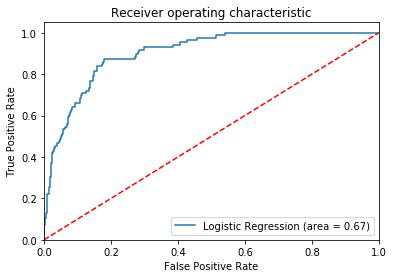

In [430]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

### Group the Data

In [437]:
print("Correlation of Columns")
dataset.corr(method='spearman').head(10)

Correlation of Columns


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
age,1.000000,0.028246,-0.008091,-0.014204,0.007179,0.013072,0.015529,0.086464,0.029247,0.009961,...,0.023714,0.015196,0.002812,0.024298,-0.008800,0.044226,-0.063853,-0.002842,-0.006591,0.017587
duration,0.028246,1.000000,-0.098310,-0.080311,0.056920,-0.068944,0.023705,-0.029160,-0.069410,-0.095347,...,-0.005613,0.024079,-0.015588,-0.021946,0.012390,0.017931,0.006862,0.015180,-0.055316,0.080605
campaign,-0.008091,-0.098310,1.000000,0.059960,-0.097753,0.173279,0.128599,0.014350,0.128145,0.153976,...,-0.066038,-0.044614,0.040080,0.056928,-0.046224,-0.008625,-0.041640,-0.076579,0.096873,-0.055344
pdays,-0.014204,-0.080311,0.059960,1.000000,-0.507412,0.227693,0.013684,-0.083513,0.233311,0.296307,...,-0.070393,-0.188869,0.003055,-0.011833,-0.001807,-0.016964,0.028334,0.000140,0.488644,-0.942457
previous,0.007179,0.056920,-0.097753,-0.507412,1.000000,-0.445049,-0.233331,-0.115118,-0.389316,-0.452448,...,0.096377,0.153216,0.012048,0.000771,0.001397,-0.001433,-0.012657,0.846434,-0.998001,0.471469
emp.var.rate,0.013072,-0.068944,0.173279,0.227693,-0.445049,1.000000,0.575597,0.228463,0.796372,0.940285,...,-0.173401,-0.137221,-0.018711,-0.019572,0.011872,0.018649,0.007305,-0.375434,0.446153,-0.215852
cons.price.idx,0.015529,0.023705,0.128599,0.013684,-0.233331,0.575597,1.000000,0.200624,0.355936,0.313130,...,-0.042026,0.033672,0.025207,0.012180,-0.036331,0.008961,-0.009130,-0.262834,0.244207,-0.019733
cons.conf.idx,0.086464,-0.029160,0.014350,-0.083513,-0.115118,0.228463,0.200624,1.000000,0.237896,0.134503,...,0.080015,0.116128,-0.001795,-0.039329,-0.024647,0.066625,-0.000479,-0.183737,0.121482,0.081139
euribor3m,0.029247,-0.069410,0.128145,0.233311,-0.389316,0.796372,0.355936,0.237896,1.000000,0.778794,...,-0.141886,-0.147038,0.046998,-0.132488,-0.013106,0.085449,0.015992,-0.307005,0.387323,-0.219871
nr.employed,0.009961,-0.095347,0.153976,0.296307,-0.452448,0.940285,0.313130,0.134503,0.778794,1.000000,...,-0.191010,-0.211561,-0.020874,-0.024064,0.025956,0.008917,0.009490,-0.341643,0.447520,-0.276489


This table include correlation numbers of first ten columns. We look at the table and delete some columns which have close correlation coefficients. 

For example, the variables *emp.var.rate, euribor3m  and nr.employed* have close  correlation coefficient, we use the strongest of them (nr.employed) to make the method more effective. And we simplify the data by making the following groupings on the data.

In [438]:
dataset['emp.var.rate'].corr(dataset['euribor3m'])

0.78643631144366166

In [439]:
dataset['nr.employed'].corr(dataset['euribor3m'])

0.75331918713177837

In [440]:
dataset=pd.read_csv('Data-main.csv',header=0)
dataset=dataset.dropna()

dataset.drop("euribor3m", axis=1, inplace=True)
dataset.drop("emp.var.rate", axis=1, inplace=True)

dataset['education']=np.where(dataset['education'] =='basic.9y', 'Basic', dataset['education'])
dataset['education']=np.where(dataset['education'] =='basic.6y', 'Basic', dataset['education'])
dataset['education']=np.where(dataset['education'] =='basic.4y', 'Basic', dataset['education'])

dataset['marital']=np.where(dataset['marital'] =='divorced', 'Single', dataset['marital'])
dataset['marital']=np.where(dataset['marital'] =='single', 'Single', dataset['marital'])

dataset['job']=np.where(dataset['job'] =='admin.', 'High', dataset['job'])
dataset['job']=np.where(dataset['job'] =='management', 'High', dataset['job'])
dataset['job']=np.where(dataset['job'] =='blue-collar', 'Basic', dataset['job'])
dataset['job']=np.where(dataset['job'] =='services', 'Basic', dataset['job'])
dataset['job']=np.where(dataset['job'] =='housemaid', 'Basic', dataset['job'])
dataset['job']=np.where(dataset['job'] =='technician', 'Basic', dataset['job'])

"divorced” and “single”  grouped together and call them “single”.

“basic.4y”, “basic.9y” and “basic.6y” grouped together and call them “basic”.

“admin.”, “management” and “entrepreneur” grouped together and call them 'high'; "blue-collar", "technician", "services" and "housemaid" grouped together and call them 'basic'.

In [441]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)
print("train and test values:",X_train.shape, X_test.shape, y_train.shape, y_test.shape)

train and test values: (3295, 39) (824, 39) (3295,) (824,)


In [442]:
logreg = LogisticRegression()
model=logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
print (model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [457]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix: ")
print(confusion_matrix)

Confusion Matrix: 
[[721  17]
 [ 54  32]]


In [458]:
print("Area under the receiver operating characteristic (ROC) curve= ",logit_roc_auc)

Area under the receiver operating characteristic (ROC) curve=  0.674528896452


This is the same results before grouping. It did not change the end result of grouping.

## SUPPORT VECTOR MACHINE

#### Introduction to Classification

Support Vector Machine (SVM) is an audited machine learning algorithm that can be used for classification or regression difficulties, but is often used in classification problems.

The classification problem can be restricted to consideration of the two-class problem without loss of generality. The goal is to separate the two classes by a function which is induced from available examples and it is to produce a classifier that will work well on unseen examples, i.e. it generalises well.


A Support Vector Machine (SVM) performs classification by finding the hyperplane that maximizes the margin between the two classes. The vectors (cases) that define the hyperplane are the support vectors.

![](http://www.saedsayad.com/images/SVM_2.png)$ [3] $

  
 #### Algorithm:

- Define an optimal hyperplane: maximize margin
- Extend the above definition for non-linearly separable problems: have a penalty term for misclassifications.
- Map data to high dimensional space where it is easier to classify with linear decision surfaces: reformulate problem so that data is mapped implicitly to this space.
- To define an optimal hyperplane we need to maximize the width of the margin (w).

![]( https://s3.amazonaws.com/quantstart/media/images/qs-svm-0003.png ) [4]


Consider the problem of separating the set of training vectors belonging to two separate classes,

 $$ D= { (x^{1},y^{1}),..., (x^{k},y^{k}) } $$
 
 where  $ x \epsilon R $  and  $ y \epsilon {-1,1} $   with a hyperplane $ < w,x> +b=0 $

The set of vectors is said to be optimally separated by the hyperplane if it is separated without error and the distance between the closest vector to the hyperplane is maximal. 

$$ min| <w,x^{i}>+b | =1 \\ $$

This incisive constraint on the parameterisation is preferable to alternatives in simpli- fying the formulation of the problem. In words it states that: the norm of the weight vector should be equal to the inverse of the distance, of the nearest point in the data set to the hyperplane.

 SVMs find a hyperplane $ w · x + b = 0 $ which correctly separates training examples and has maximum margin which is the distance between two hyperplanes $ w · x + b ≥ 1 $ and $ w · x + b ≤ −1 $ 
 
A separating hyperplane in canonical form must satisfy the following constraints,

$$ y^{i} [<w,x^{i}>+b]\geq 1 $$ where i=1,...,k $ (*) $

The distance d(w, b; x) of a point x from the hyperplane (w, b) is,
$$ d(w,b;x)=\frac{| <w,x^{i}>+b |}{\parallel w \parallel} $$ 

The optimal hyperplane is given by maximising the margin, ρ, subject to the constraints of $ (*) $. The margin is given by,

$$  ρ (w,b)= min_{x^{i}:y^{i}=-1} d(w, b; x^{i}) + min_{x^{i}:y^{i}=1} d(w, b; x^{i})=\frac {2}{\parallel w \parallel} $$

Hence the hyperplane that optimally separates the data is the one that minimises

$$ \phi (w)=\frac{1}{2} {\parallel w \parallel} ^2 $$ 
$ (**)$

The solution to the optimisation problem of $ (**) $ under the constraints $ (*) $ is given by the saddle point of the Lagrange functional 
$$ \phi (w,b,\alpha)=\frac{1}{2} {\parallel w \parallel} ^2 - \sum_i^l \alpha_{i} (y^{i} [<w,x^{i}>+b]-1) $$ , where i=1,2,...l
and $ \alpha $ are the Lagrange Multipliers. The Lagrangian has to be minimised with to w,b and maximised with respect to $ \alpha $  \geq 0. 

The minimum with respect to w and b of the Lagrangian, \phi, is given by, 
$$  \frac{\partial \phi}{\partial b}=0  \Longrightarrow \sum_i^l \alpha_{i} y_{i}=0 $$  

$$  \frac{\partial \phi}{\partial w}=0 \Longrightarrow w=\sum_i^l \alpha_{i} y_{i} x_{i} $$  

When we rewrite the minimum Lagrangian by putting w and $$b=\sum_i^l \alpha_{i} y_{i}=0 $$ then we have the maximum Lagrangian $$ maxL=\sum_i^l\alpha_{i}-\frac{1}{2}\sum_i^l \alpha_{i} \alpha_{j}y_{i}y_{j}(x_{i}x_{j}) $$ 

where $ \alpha_{i} $'s are support vectors and positive. 
 
> The simplest way to separate two groups of data is with a straight line (1 dimension), flat plane (2 dimensions) or an N-dimensional hyperplane. However, there are situations where a nonlinear region can separate the groups more efficiently. SVM handles this by using a kernel function (nonlinear) to map the data into a different space where a hyperplane (linear) cannot be used to do the separation. It means a non-linear function is learned by a linear learning machine in a high-dimensional feature space while the capacity of the system is controlled by a parameter that does not depend on the dimensionality of the space. This is called kernel trick which means the kernel function transform the data into a higher dimensional feature space to make it possible to perform the linear separation. [3]
 
$$ SVM =\begin{cases}Linear SVM & x_{i}.x_{j}\\ Non-linear SVM & \phi(x_{i}).\phi(x_{j})\\Kernel Function & k(x_{i}.x_{j})
 \end{cases}  $$


The beauty of SVM is that if the data is linearly separable, there is a unique global minimum value. An ideal SVM analysis should produce a hyperplane that completely separates the vectors (cases) into two non-overlapping classes. However, perfect separation may not be possible, or it may result in a model with so many cases that the model does not classify correctly. In this situation SVM finds the hyperplane that maximizes the margin and minimizes the misclassifications.



## Apply the Support Vector Machine Method

In [431]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("Train and Test Values:",X_train.shape, X_test.shape, y_train.shape, y_test.shape)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

Train and Test Values: (3295, 39) (824, 39) (3295,) (824,)


We divide the data to constitute out model and we divide 20% of the data randomly.

In [432]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Support Vector Machine model is formed by using *classifier()*  from the library *sklearn* and then we construct the model with *fit()* code.

In [433]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[720  18]
 [ 56  30]]


- The confusion matrix we found is seen above. From the first row, **738 customers** in the test dataset were not buying deposits (no answer); 720 of them are not bought (no) and 18 are bought (yes). 

- From the second row, **86 customers** in the train dataset were not buying deposits (no answer); 56 of them are not bought (no) and 30 are bought (yes).

- 720 + 30 = 750 samples were correctly estimated from 824 sampled dataset and the success rate was **91.01%**.

In [434]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.98      0.95       738
          1       0.62      0.35      0.45        86

avg / total       0.90      0.91      0.90       824



Of the entire test set, 90% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 91% of the customer’s preferred term deposits that were promoted. 

In [453]:
print("Support Vector Machine Score=",classifier.score(X_test_scaled, y_test))

Support Vector Machine Score= 0.910194174757


The support vector machine score is consistent the classification report. 

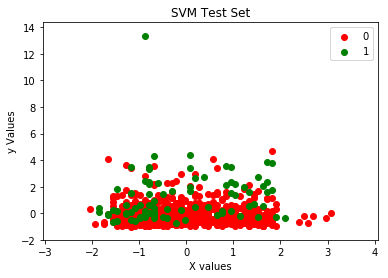

In [454]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_scaled, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
             
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Test Set')
plt.xlabel('X values')
plt.ylabel('y Values')
plt.legend()
plt.show()

### The Result

When we compare the results obtained by applying logistic regression and support vector machine algorithms to the bank data set; in both algorithms 80% of the data set was used to construct the model while 20% of the data set was used in the test phase. The logistic regression algorithm with 91.38% accuracy and the support vector machine algorithm with 91.01% were found when the accuracy ratios of the predictions of confusion matrix were calculated. It is obvious that quite close to each other as seen.

## REFERENCES


[1] http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

[2] http://www.saedsayad.com/logistic_regression.htm 

[3] http://www.saedsayad.com/images/SVM_2.png

[4] https://s3.amazonaws.com/quantstart/media/images/qs-svm-0003.png 

[5] David W. Hosmer, Stanley Lemeshow ,*Logistic Regression*, http://resource.heartonline.cn/20150528/1_3kOQSTg.pdf 

[6] Penn Stage Eberly College of Science, https://onlinecourses.science.psu.edu/stat504/node/172 [online]

[7] Hiroyasu Yamada, Yuji Matsumoto *STATISTICAL DEPENDENCY ANALYSIS WITH SUPPORT VECTOR MACHINES*,http://www.jaist.jp/~h-yamada/pdf/iwpt2003.pdf [online]

[8] Gunn, Steve R. *Support Vector Machines for Classification and Regression*,10 May 1998

[9] http://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_multivariable/BS704_Multivariable8.html [online]

[10] Penn Stage Eberly College of Science,
http://www.statsoft.com/Textbook/Support-Vector-Machines#overview [online]

[11] http://www.saedsayad.com/support_vector_machine.htm [online]

[12] http://www.statsoft.com/Textbook/Support-Vector-Machines#overview [online]




